# Airbnb Paris Project

## Table of contents: 
- Gathering data
- Assessing data
- Cleanning data
- Storing data
- Analyzing and Visualizing Data

## Gathering data

### Importing needed libraries 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
from ipyleaflet import Map, Marker
%matplotlib inline
register_matplotlib_converters()
sns.set(font_scale=1.5, style="whitegrid")

### Reading listings file

In [2]:
listings = pd.read_csv('listings.csv')
listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20201012032825,2020-10-19,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.05
1,3109,https://www.airbnb.com/rooms/3109,20201012032825,2020-10-18,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.19
2,4886,https://www.airbnb.com/rooms/4886,20201012032825,2020-10-18,Country-Style Studio Hip Area FREE CRUISE & WIFI,Bright and Cozy Studio Apartment for 2 Guests...,2 Free River Cruise Tix with your booking ! M...,https://a0.muscache.com/pictures/395578/e7f46d...,6792,https://www.airbnb.com/users/show/6792,...,9.0,10.0,9.0,7511101570436,f,11,11,0,0,0.18
3,4890,https://www.airbnb.com/rooms/4890,20201012032825,2020-10-14,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://a0.muscache.com/pictures/b144894f-bc55...,6792,https://www.airbnb.com/users/show/6792,...,10.0,10.0,10.0,NaN,t,11,11,0,0,0.21
4,5396,https://www.airbnb.com/rooms/5396,20201012032825,2020-10-15,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,...,10.0,10.0,8.0,7510402838018,f,1,1,0,0,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66329,45823497,https://www.airbnb.com/rooms/45823497,20201012032825,2020-10-18,Room with huge balcony in Paris,"Great apartment in the heart of Paris, with a ...",NaN,https://a0.muscache.com/pictures/0dee4a7a-3088...,17260870,https://www.airbnb.com/users/show/17260870,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
66330,45824219,https://www.airbnb.com/rooms/45824219,20201012032825,2020-10-20,Loft sur cour privée à Montmartre,"Quartier Abesses / Lepic, loft de 70m2 très lu...",NaN,https://a0.muscache.com/pictures/78adb00f-6e17...,6709302,https://www.airbnb.com/users/show/6709302,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
66331,45824371,https://www.airbnb.com/rooms/45824371,20201012032825,2020-10-17,Appartement avec vue sur Montmartre,"Joli appartement de 45m², balcon avec vue sur ...",NaN,https://a0.muscache.com/pictures/29a4bcd5-0dca...,65338210,https://www.airbnb.com/users/show/65338210,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
66332,45825687,https://www.airbnb.com/rooms/45825687,20201012032825,2020-10-15,Appartement sur Paris 15eme,Appartement sobre et idéalement situé sur Pari...,Quartier familiale proche de toutes commodités...,https://a0.muscache.com/pictures/321de6cc-84ac...,83264630,https://www.airbnb.com/users/show/83264630,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


### Reading calendar file

In [3]:
calendar = pd.read_csv('calendar.csv')
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2577,2020-10-19,f,$125.00,$125.00,3.0,1125.0
1,73533,2020-10-20,t,$95.00,$95.00,2.0,1125.0
2,73533,2020-10-21,t,$95.00,$95.00,2.0,1125.0
3,73533,2020-10-22,t,$95.00,$95.00,2.0,1125.0
4,73533,2020-10-23,t,$95.00,$95.00,2.0,1125.0
...,...,...,...,...,...,...,...
24214657,45493044,2021-10-10,t,$162.00,$162.00,2.0,999.0
24214658,45493044,2021-10-11,t,$162.00,$162.00,2.0,999.0
24214659,45493044,2021-10-12,t,$162.00,$162.00,2.0,999.0
24214660,45493044,2021-10-13,t,$162.00,$162.00,2.0,999.0


## Assessing data

### Listings file

In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66334 entries, 0 to 66333
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66334 non-null  int64  
 1   listing_url                                   66334 non-null  object 
 2   scrape_id                                     66334 non-null  int64  
 3   last_scraped                                  66334 non-null  object 
 4   name                                          66270 non-null  object 
 5   description                                   64989 non-null  object 
 6   neighborhood_overview                         40213 non-null  object 
 7   picture_url                                   66333 non-null  object 
 8   host_id                                       66334 non-null  int64  
 9   host_url                                      66334 non-null 

In [5]:
listings.reviews_per_month

0        0.05
1        0.19
2        0.18
3        0.21
4        1.64
         ... 
66329     NaN
66330     NaN
66331     NaN
66332     NaN
66333     NaN
Name: reviews_per_month, Length: 66334, dtype: float64

In [6]:
listings.instant_bookable

0        t
1        f
2        f
3        t
4        f
        ..
66329    t
66330    t
66331    f
66332    f
66333    f
Name: instant_bookable, Length: 66334, dtype: object

In [7]:
listings.host_response_time 

0        a few days or more
1              within a day
2        within a few hours
3        within a few hours
4            within an hour
                ...        
66329                   NaN
66330                   NaN
66331          within a day
66332    within a few hours
66333        within an hour
Name: host_response_time, Length: 66334, dtype: object

In [8]:
listings.host_response_rate

0          0%
1        100%
2        100%
3        100%
4        100%
         ... 
66329     NaN
66330     NaN
66331    100%
66332    100%
66333     99%
Name: host_response_rate, Length: 66334, dtype: object

In [9]:
listings.host_acceptance_rate

0         67%
1          0%
2        100%
3        100%
4        100%
         ... 
66329     NaN
66330     50%
66331    100%
66332    100%
66333     97%
Name: host_acceptance_rate, Length: 66334, dtype: object

In [10]:
listings.host_verifications.sample(10)

48163    ['email', 'phone', 'reviews', 'jumio', 'govern...
48870    ['email', 'phone', 'offline_government_id', 's...
65103                                   ['email', 'phone']
50789    ['email', 'phone', 'offline_government_id', 's...
6248     ['email', 'phone', 'reviews', 'offline_governm...
39892                                            ['email']
29327                 ['email', 'phone', 'reviews', 'kba']
57254    ['email', 'phone', 'google', 'reviews', 'jumio...
17865    ['email', 'phone', 'reviews', 'jumio', 'govern...
36408    ['email', 'phone', 'reviews', 'jumio', 'offlin...
Name: host_verifications, dtype: object

In [11]:
listings.host_listings_count.sample(10)

10801    1.0
44216    0.0
58552    3.0
55866    1.0
45478    3.0
8777     1.0
4641     1.0
27620    1.0
44370    1.0
36183    6.0
Name: host_listings_count, dtype: float64

In [12]:
listings.host_total_listings_count

0        2.0
1        1.0
2        9.0
3        9.0
4        1.0
        ... 
66329    1.0
66330    2.0
66331    0.0
66332    1.0
66333    5.0
Name: host_total_listings_count, Length: 66334, dtype: float64

In [13]:
listings.host_neighbourhood

0                          République
1                              Alésia
2                          République
3                          République
4        Saint-Paul - Ile Saint-Louis
                     ...             
66329                             NaN
66330    Gare du Nord - Gare de I'Est
66331                             NaN
66332                             NaN
66333                             NaN
Name: host_neighbourhood, Length: 66334, dtype: object

In [14]:
listings.neighbourhood_cleansed

0                   Entrepôt
1               Observatoire
2                 Popincourt
3                     Temple
4             Hôtel-de-Ville
                ...         
66329           Ménilmontant
66330      Buttes-Montmartre
66331    Batignolles-Monceau
66332              Vaugirard
66333                  Opéra
Name: neighbourhood_cleansed, Length: 66334, dtype: object

In [15]:
listings.neighbourhood_group_cleansed.sample(10)

21184   NaN
27961   NaN
64361   NaN
38654   NaN
41754   NaN
31235   NaN
39856   NaN
42151   NaN
43721   NaN
50594   NaN
Name: neighbourhood_group_cleansed, dtype: float64

In [16]:
listings.property_type.sample(10)

6841              Entire apartment
33532             Entire apartment
31452             Entire apartment
64981             Entire apartment
51579             Entire apartment
44926             Entire apartment
15677             Entire apartment
11188    Private room in apartment
44218             Entire apartment
15204             Entire apartment
Name: property_type, dtype: object

In [17]:
listings.accommodates.sample(10)

33484    4
28602    2
14851    2
56960    2
28053    4
62943    3
48955    3
928      6
20775    2
45888    4
Name: accommodates, dtype: int64

In [18]:
listings.availability_365

0        321
1        365
2          0
3         72
4         76
        ... 
66329      0
66330     77
66331     10
66332     79
66333      0
Name: availability_365, Length: 66334, dtype: int64

In [19]:
listings.bathrooms_text

0                 2 baths
1                  1 bath
2                  1 bath
3                  1 bath
4                  1 bath
               ...       
66329    1.5 shared baths
66330              1 bath
66331              1 bath
66332              1 bath
66333              1 bath
Name: bathrooms_text, Length: 66334, dtype: object

In [20]:
listings.amenities

0        ["Hangers", "Iron", "Laptop-friendly workspace...
1        ["Smart lock", "Luggage dropoff allowed", "Lap...
2        ["Cable TV", "Laptop-friendly workspace", "Hai...
3        ["Iron", "Shampoo", "Host greets you", "Kitche...
4        ["Extra pillows and blankets", "Long term stay...
                               ...                        
66329    ["First aid kit", "Hangers", "Iron", "Laptop-f...
66330    ["Laptop-friendly workspace", "Essentials", "H...
66331    ["Hair dryer", "Breakfast", "Heating", "Essent...
66332    ["Cable TV", "Heating", "Shampoo", "Carbon mon...
66333    ["Breakfast", "Heating", "Shampoo", "Bed linen...
Name: amenities, Length: 66334, dtype: object

In [21]:
listings.price

0        $125.00
1         $60.00
2         $89.00
3        $103.00
4         $48.00
          ...   
66329     $32.00
66330     $90.00
66331     $45.00
66332     $45.00
66333     $33.00
Name: price, Length: 66334, dtype: object

In [22]:
listings.availability_30

0         0
1        30
2         0
3        12
4        17
         ..
66329     0
66330    17
66331     2
66332    22
66333     0
Name: availability_30, Length: 66334, dtype: int64

In [23]:
listings.availability_60

0        17
1        60
2         0
3        42
4        46
         ..
66329     0
66330    47
66331     2
66332    49
66333     0
Name: availability_60, Length: 66334, dtype: int64

In [24]:
listings.calendar_last_scraped

0        2020-10-19
1        2020-10-18
2        2020-10-18
3        2020-10-14
4        2020-10-15
            ...    
66329    2020-10-18
66330    2020-10-20
66331    2020-10-17
66332    2020-10-15
66333    2020-10-16
Name: calendar_last_scraped, Length: 66334, dtype: object

In [25]:
listings.number_of_reviews

0          1
1          9
2         25
3         23
4        225
        ... 
66329      0
66330      0
66331      0
66332      0
66333      0
Name: number_of_reviews, Length: 66334, dtype: int64

In [26]:
listings.number_of_reviews_ltm

0         0
1         1
2         0
3         1
4        26
         ..
66329     0
66330     0
66331     0
66332     0
66333     0
Name: number_of_reviews_ltm, Length: 66334, dtype: int64

In [27]:
listings.number_of_reviews_l30d

0        0
1        0
2        0
3        0
4        0
        ..
66329    0
66330    0
66331    0
66332    0
66333    0
Name: number_of_reviews_l30d, Length: 66334, dtype: int64

In [28]:
listings.first_review

0        2019-01-02
1        2016-12-27
2        2009-09-05
3        2011-11-22
4        2009-06-30
            ...    
66329           NaN
66330           NaN
66331           NaN
66332           NaN
66333           NaN
Name: first_review, Length: 66334, dtype: object

In [29]:
listings.has_availability

0        t
1        t
2        t
3        t
4        t
        ..
66329    t
66330    t
66331    t
66332    t
66333    t
Name: has_availability, Length: 66334, dtype: object

In [30]:
listings.last_review

0        2019-01-02
1        2019-10-24
2        2019-05-06
3        2020-09-07
4        2020-08-08
            ...    
66329           NaN
66330           NaN
66331           NaN
66332           NaN
66333           NaN
Name: last_review, Length: 66334, dtype: object

In [31]:
listings.minimum_nights

0        3
1        2
2        3
3        4
4        1
        ..
66329    2
66330    2
66331    2
66332    2
66333    1
Name: minimum_nights, Length: 66334, dtype: int64

In [32]:
listings.maximum_nights

0        1125
1          30
2         120
3         120
4        1125
         ... 
66329    1125
66330    1125
66331    1125
66332       7
66333    1125
Name: maximum_nights, Length: 66334, dtype: int64

In [33]:
listings.minimum_nights_avg_ntm

0        3.0
1        2.0
2        3.0
3        4.0
4        1.0
        ... 
66329    2.0
66330    2.0
66331    2.0
66332    2.0
66333    1.0
Name: minimum_nights_avg_ntm, Length: 66334, dtype: float64

In [34]:
listings.bedrooms

0        2.0
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
66329    1.0
66330    1.0
66331    1.0
66332    1.0
66333    NaN
Name: bedrooms, Length: 66334, dtype: float64

In [35]:
sum(listings.duplicated())

0

### Quality
- Some columns are not useful for calculations 
- IDs are int although we wont do calculations on them
- bedrooms is float
- beds is float
- price is obj

### calendar file

In [36]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24214662 entries, 0 to 24214661
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ GB


In [37]:
sum(calendar.listing_id.duplicated())

24148332

### Quality
- date is obj
- adjusted_price is obj
- maximum_nights and minimum_nights are float
- listings_id is int
- some columns are not needed 
- the file has all the IDs activities by day, some of the IDs are not available in the listings file those IDs might be for record only and not online, or just a repeated action for the same ID 
- data entry issues with minimum_nights and maximumu_nights 
- some rows has outlier value 

### Tidiness
- date and calender_last_scrabed represents date 
- the files can be merged 
- some columns has unlogical names 

## Cleaning

### Making copies before cleaning

In [63]:
listings_clean = listings.copy()

In [64]:
calendar_clean = calendar.copy()

### The file has all the IDs activities by day, some of the IDs are not available in the listings file those IDs might be for record only and not online, or just a repeated action for the same ID
- Define: renaming the column id to match

In [65]:
calendar_clean.rename(columns = {'listing_id':'id'}, inplace=True)

- Define: droping duplicate ids from the calendar file

In [66]:
calendar_clean.drop_duplicates(subset = ['id'], keep = 'first', inplace = True)

### The files can be merged
- Define: merging the two files together

In [67]:
listings_df = pd.merge(calendar_clean, listings_clean, how = 'inner', on = ['id'])

In [68]:
listings_df

,id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,2020-10-19,f,$125.00,$125.00,3.0,1125.0,https://www.airbnb.com/rooms/2577,20201012032825,2020-10-19,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.05
1,73533,2020-10-20,t,$95.00,$95.00,2.0,1125.0,https://www.airbnb.com/rooms/73533,20201012032825,2020-10-20,...,10.0,10.0,10.0,7510102892143,t,1,1,0,0,2.23
2,21419,2020-10-14,f,$65.00,$65.00,7.0,30.0,https://www.airbnb.com/rooms/21419,20201012032825,2020-10-14,...,10.0,10.0,9.0,7510201532136,f,1,1,0,0,0.63
3,21860,2020-10-14,f,$63.00,$63.00,280.0,372.0,https://www.airbnb.com/rooms/21860,20201012032825,2020-10-14,...,9.0,10.0,9.0,NaN,f,1,1,0,0,1.08
4,73927,2020-10-18,t,$118.00,$118.00,3.0,100.0,https://www.airbnb.com/rooms/73927,20201012032825,2020-10-18,...,9.0,10.0,9.0,NaN,f,1,1,0,0,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66325,45410863,2020-10-14,f,$70.00,$70.00,2.0,1125.0,https://www.airbnb.com/rooms/45410863,20201012032825,2020-10-14,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
66326,45396964,2020-10-14,f,$80.00,$80.00,29.0,1125.0,https://www.airbnb.com/rooms/45396964,20201012032825,2020-10-14,...,NaN,NaN,NaN,NaN,f,4,0,4,0,NaN
66327,45284189,2020-10-15,f,$53.00,$53.00,NaN,NaN,https://www.airbnb.com/rooms/45284189,20201012032825,2020-10-17,...,10.0,10.0,10.0,NaN,f,1,1,0,0,3.08
66328,36270333,2020-10-21,f,$70.00,$70.00,3.0,7.0,https://www.airbnb.com/rooms/36270333,20201012032825,2020-10-21,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.32


In [69]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66330 entries, 0 to 66329
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66330 non-null  int64  
 1   date                                          66330 non-null  object 
 2   available                                     66330 non-null  object 
 3   price_x                                       66327 non-null  object 
 4   adjusted_price                                66327 non-null  object 
 5   minimum_nights_x                              64335 non-null  float64
 6   maximum_nights_x                              64335 non-null  float64
 7   listing_url                                   66330 non-null  object 
 8   scrape_id                                     66330 non-null  int64  
 9   last_scraped                                  66330 non-null 

### Some columns are not useful for calculations & some columns are not needed & date and calender_last_scrabed represents date
- Define: removing unnecessary columns

In [70]:
unnecessary_columns = ['price_x','scrape_id', 'last_scraped', 'host_listings_count', 'neighbourhood_group_cleansed',
                       'bathrooms', 'price_y', 'minimum_nights_y', 'maximum_nights_y', 'minimum_minimum_nights',
                       'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'calendar_last_scraped',
                       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'host_total_listings_count']
listings_df.drop(unnecessary_columns, axis=1, inplace=True)
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66330 entries, 0 to 66329
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66330 non-null  int64  
 1   date                                          66330 non-null  object 
 2   available                                     66330 non-null  object 
 3   adjusted_price                                66327 non-null  object 
 4   minimum_nights_x                              64335 non-null  float64
 5   maximum_nights_x                              64335 non-null  float64
 6   listing_url                                   66330 non-null  object 
 7   name                                          66266 non-null  object 
 8   description                                   64987 non-null  object 
 9   neighborhood_overview                         40211 non-null 

### some columns has unlogical names
- Define: renaming columns to be more understandable

In [71]:
listings_df.rename(columns = {'adjusted_price':'price_in_dollars',
                             'minimum_nights_x':'minimum_nights',
                             'maximum_nights_x':'maximum_nights',
                             'name':'property_name',
                             'bathrooms_text':'bathrooms'}, inplace=True)
listings_df.head(1)

,id,date,available,price_in_dollars,minimum_nights,maximum_nights,listing_url,property_name,description,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,2020-10-19,f,$125.00,3.0,1125.0,https://www.airbnb.com/rooms/2577,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.05


### maximum_nights and minimum_nights are float
- Define: fixing data entry issues with minimum_nights and maximum_nights

In [72]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66330 entries, 0 to 66329
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66330 non-null  int64  
 1   date                                          66330 non-null  object 
 2   available                                     66330 non-null  object 
 3   price_in_dollars                              66327 non-null  object 
 4   minimum_nights                                64335 non-null  float64
 5   maximum_nights                                64335 non-null  float64
 6   listing_url                                   66330 non-null  object 
 7   property_name                                 66266 non-null  object 
 8   description                                   64987 non-null  object 
 9   neighborhood_overview                         40211 non-null 

In [73]:
listings_df.minimum_nights.unique()

array([3.000e+00, 2.000e+00, 7.000e+00, 2.800e+02, 3.000e+01,       nan,
       4.000e+00, 5.000e+00, 1.000e+00, 1.000e+01, 6.000e+00, 1.800e+02,
       2.000e+01, 3.650e+02, 9.000e+01, 3.100e+01, 9.000e+00, 1.500e+01,
       1.200e+02, 1.400e+01, 2.800e+01, 1.800e+01, 8.000e+01, 3.000e+02,
       6.000e+01, 1.100e+01, 1.200e+01, 8.000e+00, 2.100e+01, 2.700e+01,
       5.000e+01, 3.600e+02, 9.900e+01, 2.500e+01, 5.000e+02, 2.500e+02,
       4.000e+01, 5.500e+01, 1.820e+02, 2.700e+02, 1.300e+01, 3.500e+01,
       9.300e+01, 9.100e+01, 1.001e+03, 3.300e+02, 1.900e+01, 2.900e+01,
       1.100e+02, 3.400e+02, 9.200e+01, 1.000e+03, 4.000e+02, 4.500e+01,
       1.000e+02, 1.750e+02, 2.400e+01, 1.560e+02, 3.700e+02, 1.500e+02,
       1.700e+01, 8.500e+01, 1.100e+03, 2.200e+01, 3.350e+02, 1.112e+03,
       6.000e+02, 2.000e+02, 7.500e+01, 1.600e+02, 2.300e+01, 2.750e+02,
       9.999e+03, 1.850e+02, 2.600e+01, 9.990e+02, 1.600e+01, 1.680e+02,
       2.100e+02, 7.000e+01, 3.080e+02, 8.400e+01, 

- Define: replacing the unlogical entries with 365

In [74]:
listings_df.minimum_nights.fillna(0, inplace=True)

number_list = [500, 1001, 1000, 400, 370, 9999, 999]
for number in number_list:
    listings_df.minimum_nights.replace(number, 365, inplace=True)    

In [75]:
listings_df.minimum_nights.unique()

array([3.000e+00, 2.000e+00, 7.000e+00, 2.800e+02, 3.000e+01, 0.000e+00,
       4.000e+00, 5.000e+00, 1.000e+00, 1.000e+01, 6.000e+00, 1.800e+02,
       2.000e+01, 3.650e+02, 9.000e+01, 3.100e+01, 9.000e+00, 1.500e+01,
       1.200e+02, 1.400e+01, 2.800e+01, 1.800e+01, 8.000e+01, 3.000e+02,
       6.000e+01, 1.100e+01, 1.200e+01, 8.000e+00, 2.100e+01, 2.700e+01,
       5.000e+01, 3.600e+02, 9.900e+01, 2.500e+01, 2.500e+02, 4.000e+01,
       5.500e+01, 1.820e+02, 2.700e+02, 1.300e+01, 3.500e+01, 9.300e+01,
       9.100e+01, 3.300e+02, 1.900e+01, 2.900e+01, 1.100e+02, 3.400e+02,
       9.200e+01, 4.500e+01, 1.000e+02, 1.750e+02, 2.400e+01, 1.560e+02,
       1.500e+02, 1.700e+01, 8.500e+01, 1.100e+03, 2.200e+01, 3.350e+02,
       1.112e+03, 6.000e+02, 2.000e+02, 7.500e+01, 1.600e+02, 2.300e+01,
       2.750e+02, 1.850e+02, 2.600e+01, 1.600e+01, 1.680e+02, 2.100e+02,
       7.000e+01, 3.080e+02, 8.400e+01, 1.120e+02, 4.200e+01, 2.600e+02,
       5.600e+01, 6.300e+01, 2.220e+02, 3.100e+02, 

In [76]:
listings_df.maximum_nights.unique()

array([1.12500000e+03, 3.00000000e+01, 3.72000000e+02, 1.00000000e+02,
       7.30000000e+02,            nan, 1.50000000e+01, 1.20000000e+02,
       3.65000000e+02, 4.50000000e+01, 1.80000000e+02, 1.30000000e+02,
       2.10000000e+01, 7.50000000e+01, 1.90000000e+02, 3.00000000e+02,
       6.00000000e+01, 2.50000000e+01, 1.00000000e+01, 3.05000000e+02,
       9.00000000e+01, 1.30000000e+01, 8.00000000e+00, 4.00000000e+01,
       2.80000000e+01, 7.50000000e+02, 1.12400000e+03, 7.00000000e+00,
       5.00000000e+02, 3.60000000e+02, 1.40000000e+01, 2.70000000e+01,
       2.00000000e+02, 2.00000000e+01, 4.00000000e+00, 3.60000000e+01,
       9.20000000e+01, 2.00000000e+00, 3.10000000e+01, 1.80000000e+01,
       3.00000000e+00, 2.90000000e+01, 1.50000000e+02, 1.70000000e+01,
       2.50000000e+02, 3.30000000e+02, 1.20000000e+01, 3.80000000e+01,
       6.00000000e+00, 7.00000000e+01, 2.40000000e+01, 1.00100000e+03,
       5.00000000e+01, 1.60000000e+01, 3.50000000e+01, 4.20000000e+01,
      

- Define: replacing the unlogical entries with 365

In [77]:
listings_df.maximum_nights.fillna(0, inplace=True)

number_list_2 = [364, 999, 99999, 85554, 10000000, 5400, 50000, 5000, 363, 372, 370, 371, 364, 380, 361]
for number in number_list_2:
    listings_df.maximum_nights.replace(number, 365, inplace=True)  

In [78]:
listings_df.maximum_nights.sort_values()

63459    0.000000e+00
13482    0.000000e+00
54414    0.000000e+00
42941    0.000000e+00
42932    0.000000e+00
             ...     
1783     2.250000e+03
2025     3.000000e+03
55092    2.147484e+09
55088    2.147484e+09
55082    2.147484e+09
Name: maximum_nights, Length: 66330, dtype: float64

### Some rows has outlier value
- Define: removing rows that has outlier value

In [79]:
#these rows must be dropped because it has outlier value
listings_df.drop(listings_df.index[55092], inplace=True)
listings_df.drop(listings_df.index[55088], inplace=True)
listings_df.drop(listings_df.index[55082], inplace=True)

In [80]:
listings_df.maximum_nights.unique()

array([1.125e+03, 3.000e+01, 3.650e+02, 1.000e+02, 7.300e+02, 0.000e+00,
       1.500e+01, 1.200e+02, 4.500e+01, 1.800e+02, 1.300e+02, 2.100e+01,
       7.500e+01, 1.900e+02, 3.000e+02, 6.000e+01, 2.500e+01, 1.000e+01,
       3.050e+02, 9.000e+01, 1.300e+01, 8.000e+00, 4.000e+01, 2.800e+01,
       7.500e+02, 1.124e+03, 7.000e+00, 5.000e+02, 3.600e+02, 1.400e+01,
       2.700e+01, 2.000e+02, 2.000e+01, 4.000e+00, 3.600e+01, 9.200e+01,
       2.000e+00, 3.100e+01, 1.800e+01, 3.000e+00, 2.900e+01, 1.500e+02,
       1.700e+01, 2.500e+02, 3.300e+02, 1.200e+01, 3.800e+01, 6.000e+00,
       7.000e+01, 2.400e+01, 1.001e+03, 5.000e+01, 1.600e+01, 3.500e+01,
       4.200e+01, 9.000e+00, 6.000e+02, 5.000e+00, 3.400e+01, 8.000e+01,
       2.000e+03, 3.500e+02, 6.200e+01, 3.700e+01, 7.000e+02, 1.400e+02,
       2.100e+02, 2.200e+01, 6.500e+01, 1.100e+02, 2.700e+02, 7.200e+02,
       1.120e+03, 1.250e+02, 4.400e+01, 6.100e+01, 4.000e+02, 1.000e+00,
       1.122e+03, 3.300e+01, 2.450e+02, 2.250e+03, 

### IDs are int although we wont do calculations on them & bedrooms is float & beds is float & price is obj & Date is obj
- Define: fixing all NAN issues

In [81]:
listings.bedrooms.fillna(0, inplace=True)

In [82]:
listings.bedrooms

0        2.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
66329    1.0
66330    1.0
66331    1.0
66332    1.0
66333    0.0
Name: bedrooms, Length: 66334, dtype: float64

In [83]:
listings.beds.fillna(0, inplace=True)

In [84]:
listings.beds.value_counts()

1.0     35004
2.0     19225
3.0      5901
4.0      2371
0.0      2245
5.0       916
6.0       382
7.0       120
8.0        77
9.0        43
10.0       21
12.0        9
11.0        8
18.0        2
13.0        2
40.0        1
83.0        1
85.0        1
77.0        1
16.0        1
90.0        1
19.0        1
79.0        1
Name: beds, dtype: int64

- Adjusting price column to change it to int for calculations

In [85]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66327 entries, 0 to 66329
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66327 non-null  int64  
 1   date                                          66327 non-null  object 
 2   available                                     66327 non-null  object 
 3   price_in_dollars                              66324 non-null  object 
 4   minimum_nights                                66327 non-null  float64
 5   maximum_nights                                66327 non-null  float64
 6   listing_url                                   66327 non-null  object 
 7   property_name                                 66263 non-null  object 
 8   description                                   64984 non-null  object 
 9   neighborhood_overview                         40208 non-null 

- Define: removing ($) and indentations

In [86]:
listings_df.price_in_dollars = listings_df.price_in_dollars.str.strip('$')
listings_df.price_in_dollars = listings_df.price_in_dollars.str.replace(r'\D+','')

- Define: changing datatypes

In [87]:
listings_df['id'] = listings_df['id'].astype('object')
listings_df['minimum_nights'] = listings_df['minimum_nights'].astype('int')
listings_df['maximum_nights'] = listings_df['maximum_nights'].astype('int')
listings_df['bedrooms'] = listings_df['bedrooms'].astype('int')
listings_df['beds'] = listings_df['beds'].astype('int')
listings_df['price_in_dollars'] = listings_df['price_in_dollars'].astype('float')
listings_df['host_id'] = listings_df['host_id'].astype('object')
listings_df['date'] = pd.to_datetime(listings_df['date'])

In [88]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66327 entries, 0 to 66329
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            66327 non-null  object        
 1   date                                          66327 non-null  datetime64[ns]
 2   available                                     66327 non-null  object        
 3   price_in_dollars                              66324 non-null  float64       
 4   minimum_nights                                66327 non-null  int32         
 5   maximum_nights                                66327 non-null  int32         
 6   listing_url                                   66327 non-null  object        
 7   property_name                                 66263 non-null  object        
 8   description                                   64984 non-null  obje

## Storing the final data to a new file

In [89]:
listings_df.to_csv('New_listings_calendar_cleaned.csv', encoding='utf-8',index=False)

## Analyzing and Visualizing Data
## Analyzing

### Reading new cleaned file

In [90]:
df_1 = pd.read_csv('New_listings_calendar_cleaned.csv')
df_1

,id,date,available,price_in_dollars,minimum_nights,maximum_nights,listing_url,property_name,description,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,2020-10-19,f,12500.0,3,1125,https://www.airbnb.com/rooms/2577,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.05
1,73533,2020-10-20,t,9500.0,2,1125,https://www.airbnb.com/rooms/73533,Apartment near The Louvre,Apartment in the center near the Louvre. The n...,NaN,...,10.0,10.0,10.0,7510102892143,t,1,1,0,0,2.23
2,21419,2020-10-14,f,6500.0,7,30,https://www.airbnb.com/rooms/21419,charming heart of paris,This charming fully furnished (50 sqm 560/sq) ...,Central !,...,10.0,10.0,9.0,7510201532136,f,1,1,0,0,0.63
3,21860,2020-10-14,f,6300.0,280,365,https://www.airbnb.com/rooms/21860,Cute Nest (2p long term) Heart Paris/Louvre/Ma...,Ideal Internship/Mission<br />32% discount 1 m...,"Very hip, friendly and pedestrian area,<br />w...",...,9.0,10.0,9.0,NaN,f,1,1,0,0,1.08
4,73927,2020-10-18,t,11800.0,3,100,https://www.airbnb.com/rooms/73927,Calm & Beautiful Parisian Apartment,Welcome to a typical parisian apartment with a...,The neighborhood is great. <br /><br />The typ...,...,9.0,10.0,9.0,NaN,f,1,1,0,0,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66322,45410863,2020-10-14,f,7000.0,2,1125,https://www.airbnb.com/rooms/45410863,appartement de charme Vincennes à 15min de Paris,Un nid douillet au cœur de Vincennes.<br />Au ...,Un environnement vert dans une ville dynamique...,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
66323,45396964,2020-10-14,f,8000.0,29,1125,https://www.airbnb.com/rooms/45396964,Xl Chambre 20m2 APT hausmannien villette,NaN,NaN,...,NaN,NaN,NaN,NaN,f,4,0,4,0,NaN
66324,45284189,2020-10-15,f,5300.0,0,0,https://www.airbnb.com/rooms/45284189,⭐️⭐️ Garibaldi 2 pièces porte de Montmartre⭐️⭐️,Mon logement est à 5 mn de Paris. Entièrement ...,Le logement d'Alban est situé à Saint-Ouen-sur...,...,10.0,10.0,10.0,NaN,f,1,1,0,0,3.08
66325,36270333,2020-10-21,f,7000.0,3,7,https://www.airbnb.com/rooms/36270333,Nice Studio in Pantin :),Petit studio cosy aux portes de Paris. <br />S...,NaN,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.32


In [91]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66327 entries, 0 to 66326
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66327 non-null  int64  
 1   date                                          66327 non-null  object 
 2   available                                     66327 non-null  object 
 3   price_in_dollars                              66324 non-null  float64
 4   minimum_nights                                66327 non-null  int64  
 5   maximum_nights                                66327 non-null  int64  
 6   listing_url                                   66327 non-null  object 
 7   property_name                                 66263 non-null  object 
 8   description                                   64984 non-null  object 
 9   neighborhood_overview                         40208 non-null 

- Define: changing tadatypes

In [92]:
df_1['id'] = df_1['id'].astype('object')
df_1['date'] = pd.to_datetime(df_1['date'])
df_1['host_id'] = df_1['host_id'].astype('object')
df_1['host_id'] = df_1['host_id'].astype('object')

In [93]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66327 entries, 0 to 66326
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            66327 non-null  object        
 1   date                                          66327 non-null  datetime64[ns]
 2   available                                     66327 non-null  object        
 3   price_in_dollars                              66324 non-null  float64       
 4   minimum_nights                                66327 non-null  int64         
 5   maximum_nights                                66327 non-null  int64         
 6   listing_url                                   66327 non-null  object        
 7   property_name                                 66263 non-null  object        
 8   description                                   64984 non-null  obje

### Removing files that wont be used in calculations and performing statistical calculations

In [94]:
unnecessary_columns_1 = ['latitude', 'longitude', 'bedrooms', 'beds', 'number_of_reviews', 'reviews_per_month']
                       
df_1.drop(unnecessary_columns_1, axis=1, inplace=True)
df_1.describe()

,price_in_dollars,minimum_nights,maximum_nights,accommodates,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,6.632400e+04,66327.00000,66327.000000,66327.000000,66327.000000,66327.000000,66327.000000,66327.000000,50040.000000,49991.000000,50001.000000,49974.000000,49994.000000,49974.000000,49974.000000,66327.000000,66327.000000,66327.000000,66327.000000
mean,1.141089e+04,5.53580,725.260377,3.051352,7.600856,16.305984,25.947397,93.550937,93.009852,9.594687,9.203976,9.676352,9.711645,9.682295,9.269960,8.093175,7.678683,0.247697,0.021349
std,2.436220e+04,23.88289,518.935434,1.587981,11.679708,24.255035,36.522647,134.517376,8.859148,0.835159,1.103292,0.775933,0.755368,0.696648,0.941051,34.966784,34.994959,1.073720,0.351522
min,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,5.900000e+03,1.00000,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,8.000000e+03,2.00000,1125.000000,2.000000,0.000000,0.000000,0.000000,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000
75%,1.190000e+04,4.00000,1125.000000,4.000000,16.000000,43.000000,67.000000,178.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000
max,1.159900e+06,1125.00000,3000.000000,16.000000,30.000000,60.000000,90.000000,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,310.000000,310.000000,25.000000,11.000000


### Getting the number of listing by neighborhood
- Define: removing all NAN data

In [95]:
df_1.neighbourhood.dropna()

2                    Paris, Ile-de-France, France
3                    Paris, Île-de-France, France
4                    Paris, Île-de-France, France
5                    Paris, Île-de-France, France
6                    Paris, Ile-de-France, France
                           ...                   
66311    Neuilly-sur-Seine, Île-de-France, France
66313            Montrouge, Île-de-France, France
66318     Nogent-sur-Marne, Île-de-France, France
66322            Vincennes, Île-de-France, France
66324           Saint-Ouen, Île-de-France, France
Name: neighbourhood, Length: 40208, dtype: object

- Number of listing by neighborhood = 40208

### Getting property types in Paris

In [96]:
df_1.property_type.unique()

array(['Entire loft', 'Entire apartment', 'Private room in apartment',
       'Private room in bed and breakfast', 'Room in bed and breakfast',
       'Entire house', 'Entire condominium', 'Private room in townhouse',
       'Private room in house', 'Private room in condominium',
       'Entire guesthouse', 'Shared room in apartment',
       'Private room in guesthouse', 'Entire townhouse',
       'Entire guest suite', 'Boat', 'Private room in loft',
       'Entire floor', 'Entire villa', 'Tiny house',
       'Room in serviced apartment', 'Private room in guest suite',
       'Entire serviced apartment', 'Houseboat', 'Room in boutique hotel',
       'Private room in serviced apartment', 'Treehouse', 'Earth house',
       'Entire cottage', 'Private room in houseboat',
       'Private room in nature lodge', 'Room in aparthotel',
       'Entire place', 'Private room in earth house',
       'Entire bed and breakfast', 'Shared room in igloo',
       'Shared room in loft', 'Private room in c

#### Property types in Paris are:
- Entire loft 
- Entire apartment
- Private room in apartment
- Private room in bed and breakfast
- Room in bed and breakfast
- Entire house
- Entire condominium
- Private room in townhouse
- Private room in house
- Private room in condominium
- Entire guesthouse
- Shared room in apartment
- Private room in guesthouse
- Entire townhouse
- Entire guest suite
- Boat
- Private room in loft
- Entire floor
- Entire villa
- Tiny house
- Room in serviced apartment
- Private room in guest suite
- Entire serviced apartment
- Houseboat
- Room in boutique hotel
- Private room in serviced apartment
- Treehouse
- Earth house
- Entire cottage
- Private room in houseboat
- Private room in nature lodge
- Room in aparthotel
- Entire place
- Private room in earth house
- Entire bed and breakfast
- Shared room in igloo
- Shared room in loft
- Private room in chalet
- Cave
- Private room in villa
- Private room
- Shared room in house
- Room in hotel
- Shared room in condominium
- Shared room in townhouse
- Entire home/apt
- Shared room in tiny house
- Private room in boat
- Dome house
- Shared room in bed and breakfast
- Shared room in guesthouse
- Private room in hostel
- Shared room in guest suite
- Entire bungalow
- Room in hostel
- Shared room in hostel
- Private room in cabin
- Shared room in boutique hotel
- Shared room in cabin
- Island
- Barn
- Campsite
- Shared room in serviced apartment
- Casa particular
- Entire chalet
- Private room in casa particular
- Camper/RV

###  Calculating the average price for 2 acommodates per 1 night
- Define: removing the NAN inputs

In [97]:
df_1.accommodates.fillna(0, inplace=True)

In [98]:
df_1.accommodates.drop(0)

1        3
2        2
3        2
4        4
5        2
        ..
66322    4
66323    1
66324    2
66325    2
66326    4
Name: accommodates, Length: 66326, dtype: int64

In [99]:
df_1.groupby('accommodates').mean()

,price_in_dollars,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
accommodates,,,,,,,,,,,,,,,,,,
0,62500.000000,0.875000,746.875000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.062500,0.000000,0.062500,0.000000
1,6061.253561,7.297879,611.448876,8.145299,17.599557,28.230769,99.944603,92.881567,9.573405,9.224253,9.719768,9.713521,9.702860,9.319035,2.585945,1.088319,0.990503,0.213675
2,8266.136588,5.479307,713.805615,7.028782,15.050784,23.901359,82.330930,93.251297,9.619822,9.229271,9.698782,9.737434,9.689554,9.302654,6.211735,5.730363,0.293335,0.012203
3,9947.687225,5.312303,722.479075,7.539176,16.112492,25.656860,89.864852,92.724475,9.578180,9.144581,9.678817,9.705576,9.657637,9.246042,8.227974,7.921492,0.173537,0.007867
4,12689.132153,5.465244,756.668370,7.564860,16.302925,25.957185,95.284620,92.674706,9.574553,9.166314,9.633680,9.684121,9.677210,9.241604,9.782643,9.602445,0.092927,0.010460
5,17379.774407,5.830027,715.787631,7.996888,17.056009,27.376507,111.150914,93.152107,9.587963,9.225939,9.678167,9.705398,9.672671,9.252058,9.642940,9.479191,0.112797,0.000778
6,23711.661564,5.445310,767.499304,9.579738,20.518230,32.765377,132.246869,93.004788,9.549576,9.216366,9.641830,9.660523,9.669985,9.184735,15.243251,14.971333,0.121069,0.018369
7,26210.537190,4.078512,713.712810,9.888430,20.830579,33.876033,141.274793,93.633952,9.591512,9.214854,9.750663,9.710875,9.737401,9.225464,9.570248,9.402893,0.105372,0.000000
8,33437.653479,4.809004,786.444748,13.229195,28.684857,45.098226,182.577080,92.579130,9.499130,9.229565,9.608696,9.610435,9.662609,9.144348,17.185539,16.825375,0.156889,0.053206


- The above table shows the average price for 2 acommodates in 5 nights = 8266 dollars
- So for 1 night = 1508.4 dollars

### Preparing a file that contains the number of listings available by date for one year
- Define: removing the unwanted columns

In [100]:
unnecessary_columns_2 = ['id', 'price_in_dollars', 'minimum_nights', 'maximum_nights', 'listing_url', 'property_name',
                        'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name',
                        'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
                        'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
                        'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                        'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
                        'accommodates', 'bathrooms', 'amenities', 'availability_30', 'availability_60',
                        'availability_90', 'first_review', 'last_review', 'review_scores_rating',
                        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                        'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license',
                        'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                        'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
df_2 = df_1
df_2.drop(unnecessary_columns_2, axis=1, inplace=True)
df_2

,date,available,availability_365
0,2020-10-19,f,321
1,2020-10-20,t,61
2,2020-10-14,f,136
3,2020-10-14,f,362
4,2020-10-18,t,365
...,...,...,...
66322,2020-10-14,f,287
66323,2020-10-14,f,360
66324,2020-10-15,f,0
66325,2020-10-21,f,0


- Define: droping all the unavailable listings

In [101]:
df_2 = df_2[df_2.available != 'f']
df_2

,date,available,availability_365
1,2020-10-20,t,61
4,2020-10-18,t,365
5,2020-10-18,t,365
12,2020-10-21,t,0
17,2020-10-18,t,365
...,...,...,...
66296,2020-10-15,t,358
66297,2020-10-14,t,365
66304,2020-10-15,t,347
66312,2020-10-15,t,0


- Define: getting listings with one year availabilty only

In [102]:
df_2 = df_2[df_2.availability_365 == 365]
df_2

,date,available,availability_365
4,2020-10-18,t,365
5,2020-10-18,t,365
17,2020-10-18,t,365
40,2020-10-15,t,365
41,2020-10-16,t,365
...,...,...,...
66261,2020-10-15,t,365
66274,2020-10-17,t,365
66278,2020-10-18,t,365
66292,2020-10-19,t,365


- Since all of them are in 2020 then the number of listings available by date for one year is: 2357
- Storing the result into separet file

In [103]:
df_2.to_csv('Number of listings available by date (For one year).csv', encoding='utf-8',index=False)

#### Preparing a file that the average price of available 2 persons accommodation can be calculated from
- Define: creating a new file

In [104]:
df_3 = pd.read_csv('New_listings_calendar_cleaned.csv')

- Define: removing unwanted columns

In [105]:
unnecessary_columns_3 = ['id', 'minimum_nights', 'maximum_nights', 'listing_url', 'property_name',
                        'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name',
                        'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
                        'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
                        'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                        'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
                        'bathrooms', 'amenities', 'availability_30', 'availability_60',
                        'availability_90', 'first_review', 'last_review', 'review_scores_rating',
                        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                        'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license',
                        'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                        'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                        'latitude', 'longitude', 'bedrooms', 'beds', 'number_of_reviews', 'reviews_per_month']

df_3.drop(unnecessary_columns_3, axis=1, inplace=True)
df_3

,date,available,price_in_dollars,accommodates,availability_365
0,2020-10-19,f,12500.0,4,321
1,2020-10-20,t,9500.0,3,61
2,2020-10-14,f,6500.0,2,136
3,2020-10-14,f,6300.0,2,362
4,2020-10-18,t,11800.0,4,365
...,...,...,...,...,...
66322,2020-10-14,f,7000.0,4,287
66323,2020-10-14,f,8000.0,1,360
66324,2020-10-15,f,5300.0,2,0
66325,2020-10-21,f,7000.0,2,0


- Define: removing the unavailable listings

In [106]:
df_3 = df_3[df_3.available != 'f']
df_3

,date,available,price_in_dollars,accommodates,availability_365
1,2020-10-20,t,9500.0,3,61
4,2020-10-18,t,11800.0,4,365
5,2020-10-18,t,6000.0,2,365
12,2020-10-21,t,9900.0,2,0
17,2020-10-18,t,10000.0,4,365
...,...,...,...,...,...
66296,2020-10-15,t,8000.0,3,358
66297,2020-10-14,t,100000.0,16,365
66304,2020-10-15,t,10100.0,2,347
66312,2020-10-15,t,8000.0,2,0


 - Define: getting only 2 person accommodates

In [107]:
df_3 = df_3[df_3.accommodates == 2]
df_3

,date,available,price_in_dollars,accommodates,availability_365
5,2020-10-18,t,6000.0,2,365
12,2020-10-21,t,9900.0,2,0
41,2020-10-16,t,12500.0,2,365
47,2020-10-16,t,11400.0,2,365
52,2020-10-18,t,12900.0,2,365
...,...,...,...,...,...
66261,2020-10-15,t,7500.0,2,365
66263,2020-10-14,t,13500.0,2,180
66287,2020-10-19,t,7900.0,2,357
66304,2020-10-15,t,10100.0,2,347


- Define: getting one year available only

In [108]:
df_3 = df_3[df_3.availability_365 == 365]
df_3

,date,available,price_in_dollars,accommodates,availability_365
5,2020-10-18,t,6000.0,2,365
41,2020-10-16,t,12500.0,2,365
47,2020-10-16,t,11400.0,2,365
52,2020-10-18,t,12900.0,2,365
113,2020-10-17,t,25000.0,2,365
...,...,...,...,...,...
66208,2020-10-17,t,4000.0,2,365
66228,2020-10-20,t,8000.0,2,365
66234,2020-10-17,t,8500.0,2,365
66248,2020-10-15,t,7500.0,2,365


- Define: calculating the average

In [109]:
df_3.price_in_dollars.mean()

14739.52606635071

- Average price of available 2 persons accommodation = 14739.5 dollars
- Define: Storing the result into separet file

In [110]:
df_3.to_csv('Average price of available 2 persons accommodation by date (For one year).csv', encoding='utf-8',index=False)

## Visualization

- Define: reading the cleaned file and changing datatypes
- Define: changing the date column to datetime type

In [111]:
df = pd.read_csv('New_listings_calendar_cleaned.csv', parse_dates=['date'], index_col=['date'])

In [112]:
df['id'] = df['id'].astype('object')
df['host_id'] = df['host_id'].astype('object')

### Relation between price and date in Paris

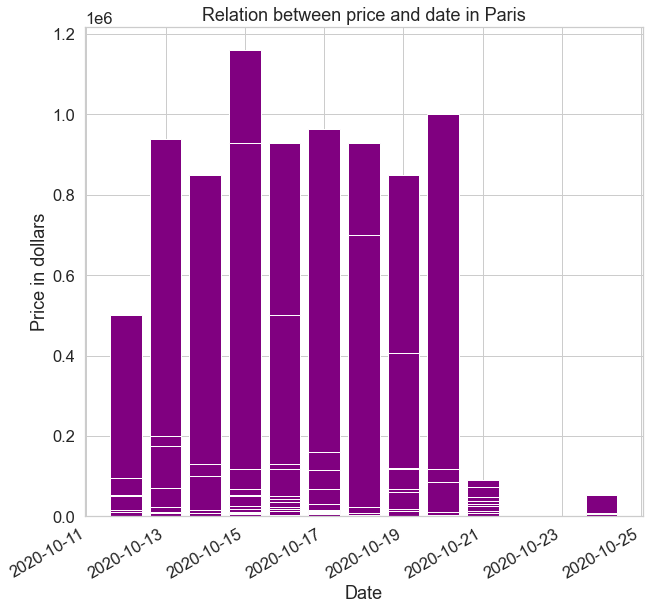

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(df.index.values, df['price_in_dollars'], color='purple')
ax.set(xlabel="Date", ylabel="Price in dollars", title="Relation between price and date in Paris")
ax.xaxis_date()    
fig.autofmt_xdate()
plt.show()

- Notice that there is an increase in price from 13-10-2020 to 21-10-2020, then the price droped massively

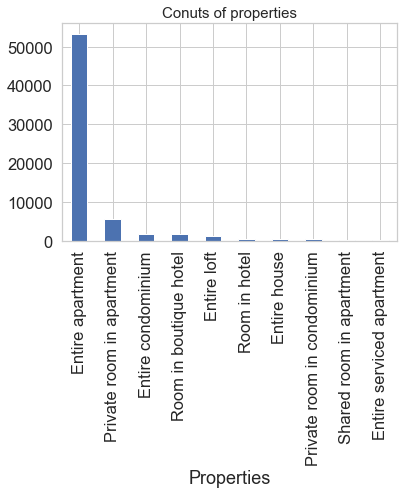

In [114]:
df['property_type'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.title('Conuts of properties', size=15)
plt.xlabel('Properties')
plt.savefig('Conuts of properties');

- Entire apartment is the higest property displayed 

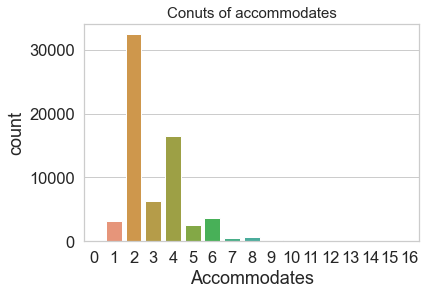

In [115]:
sns.countplot(data=df, x='accommodates')
plt.title('Conuts of accommodates', size=15)
plt.xlabel('Accommodates')
plt.savefig('Conuts of accommodates');

- Properties with 2 accomodates are the most displayed

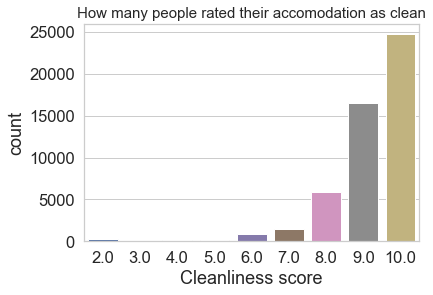

In [116]:
sns.countplot(data=df, x='review_scores_cleanliness')
plt.title('How many people rated their accomodation as clean', size=15)
plt.xlabel('Cleanliness score')
plt.savefig('How many people rated their accomodation as clean');

- This show that people were satisfied with the cleaness of the property

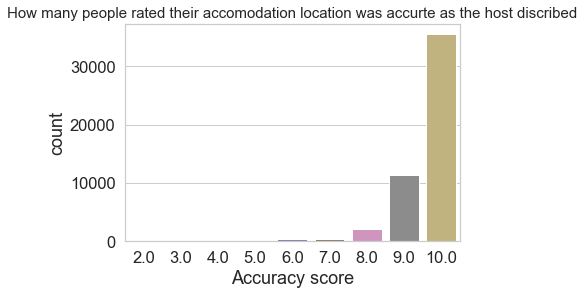

In [117]:
sns.countplot(data=df, x='review_scores_accuracy')
plt.title('How many people rated their accomodation location was accurte as the host discribed', size=15)
plt.xlabel('Accuracy score')
plt.savefig('How many people rated their accomodation location was accurte as the host discribed');

- This show that people were satisfied with the location accuracy of the property

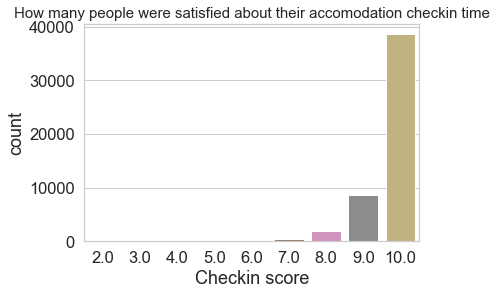

In [118]:
sns.countplot(data=df, x='review_scores_checkin')
plt.title('How many people were satisfied about their accomodation checkin time', size=15)
plt.xlabel('Checkin score')
plt.savefig('How many people were satisfied about their accomodation checkin time');

- This show that people were satisfied with the checkin time of the property

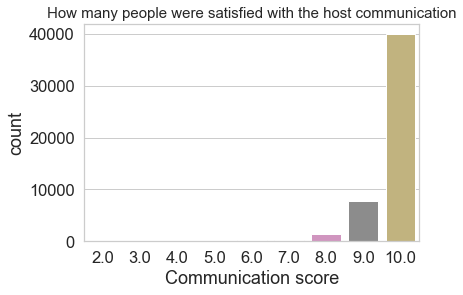

In [119]:
sns.countplot(data=df, x='review_scores_communication')
plt.title('How many people were satisfied with the host communication', size=15)
plt.xlabel('Communication score')
plt.savefig('How many people were satisfied with the host communication');

- This show that people were satisfied with the host communication

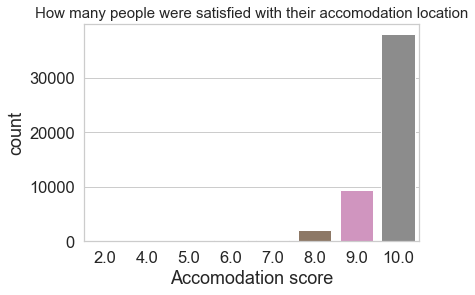

In [120]:
sns.countplot(data=df, x='review_scores_location')
plt.title('How many people were satisfied with their accomodation location', size=15)
plt.xlabel('Accomodation score')
plt.savefig('How many people were satisfied with their accomodation location');

- This show that people were satisfied with the location of the property

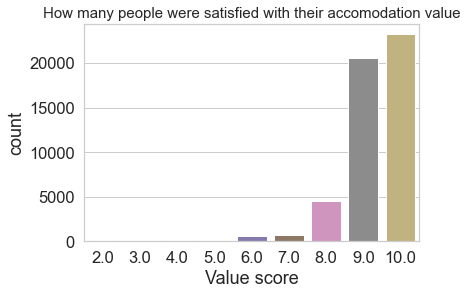

In [121]:
sns.countplot(data=df, x='review_scores_value')
plt.title('How many people were satisfied with their accomodation value', size=15)
plt.xlabel('Value score')
plt.savefig('How many people were satisfied with their accomodation value');

- This show that most of the properties were rated as high value

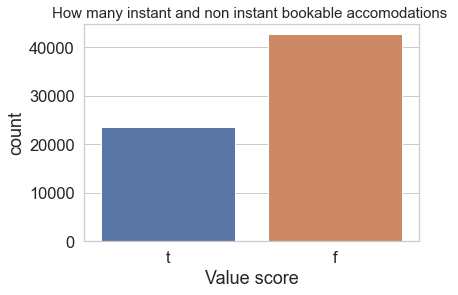

In [122]:
sns.countplot(data=df, x='instant_bookable')
plt.title('How many instant and non instant bookable accomodations ', size=15)
plt.xlabel('Value score')
plt.savefig('How many instant and non instant bookable accomodations');

- This show that most properties are not instant bookable

### Visualization of some data on map

In [137]:
df.latitude.unique()

array([48.86993, 48.86411, 48.86631, ..., 48.90073, 48.90147, 48.90399])

In [142]:
df.longitude.unique()

array([2.36251, 2.34309, 2.35033, ..., 2.47506, 2.22138, 2.43856])

#### To see the map run the following codes first

In [144]:
!pip install ipyleaflet

In [142]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


#### Sometimes the map might not show, if that happens open a new terminal and run the code below

import pandas as pd

import numpy as np

from ipyleaflet import Map, Marker

m = Map(center=[48.8566, 2.3522], zoom=10)

m.add_layer(Marker(location=(48.86993, 2.36251)))

m.add_layer(Marker(location=(48.86411, 2.34309)))

m.add_layer(Marker(location=(48.86631, 2.35033)))

m.add_layer(Marker(location=(48.90073, 2.47506)))

m.add_layer(Marker(location=(48.90147, 2.22138)))

m.add_layer(Marker(location=(48.90399, 2.43856)))

m

- The first line of code represents the lon and lat for Paris
- The following lines plots the location of the property on the map, to get any location enter only the lon and lat desired as shown 

In [123]:
#Paris city lon and lat
m = Map(center=[48.8566, 2.3522], zoom=10)
#property lon and lat
m.add_layer(Marker(location=(48.86993, 2.36251)))
m.add_layer(Marker(location=(48.86411, 2.34309)))
m.add_layer(Marker(location=(48.86631, 2.35033)))
m.add_layer(Marker(location=(48.90073, 2.47506)))
m.add_layer(Marker(location=(48.90147, 2.22138)))
m.add_layer(Marker(location=(48.90399, 2.43856)))
m

Map(center=[48.8566, 2.3522], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…